# Data understanding
This notebook is made to explore the structure in the data and the relations beyween the variables and understand the context captured in this files.
The goal of this first notebook is to formulate relevant questions to make insights about AirBnB data and propose some applications based on the questions made.

## Data
The data chosed for this analysis is the AirBnB data for housing prices in the Boston city.
The dataset can be found on [this link](https://www.kaggle.com/airbnb/boston)

In [29]:
! ls data/

calendar.csv  listings.csv  reviews.csv


In [30]:
# import libraries
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [31]:
data_dir = Path('data')
calendar_df = pd.read_csv(str(data_dir / 'calendar.csv'), parse_dates=["date"])
listings_df = pd.read_csv(str(data_dir / 'listings.csv'))
reviews_df = pd.read_csv(str(data_dir / 'reviews.csv'), parse_dates=["date"])

## Structure of the data

### Calendar

In [32]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [33]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [34]:
print("start date: ", calendar_df["date"].min())
print("end date: ", calendar_df["date"].max())

start date:  2016-09-06 00:00:00
end date:  2017-09-05 00:00:00


The calendar files contains data from the prices of rental of each listing along a period of time starting from **2016-09-06** to **2017-09-05**

In [35]:
calendar_df["available"].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [36]:
calendar_df[calendar_df["available"] == 'f']["price"].count()

0

the available values are just **true** (t) or **false** (f) and the prices are missing where there is no availability.

In [37]:
listings_no = len(calendar_df["listing_id"].unique())
print(f"there are {listings_no} listings registered in this file")

there are 3585 listings registered in this file


### Listings

In [38]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


At first glance we can see there are a lot of columns in the listings dataset (95 columns) and one row for each listing in the calendar dataset (3585 listings). To have some knowledge of the data in this file each column is listed with the counting of non-null values.

In [39]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

The 95 columns of listings contains information about the characteristics of the house for rental. We can notice some columns that may not give us too much information like those which are unique identifiers like **id**, **listing_url**, **scrape_id**, etc. 

Lets be sure wich columns may give us useful information looking at the number of unique values.

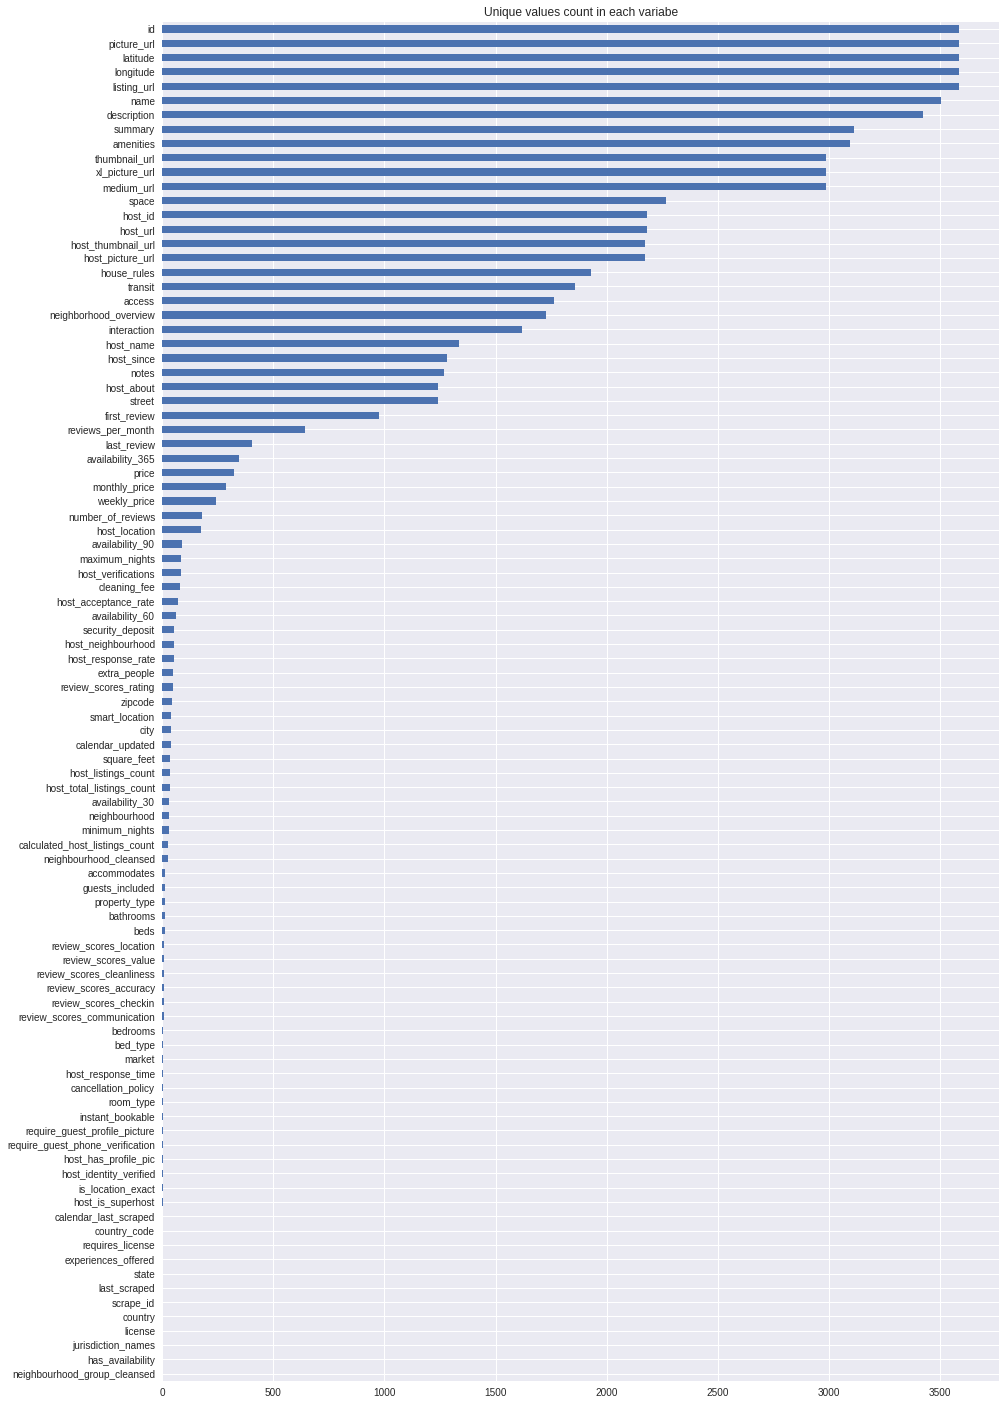

In [60]:
listings_unique = listings_df.nunique().sort_values()
listings_unique.plot.barh(title="Unique values count in each variabe", figsize=(15,25));

In [41]:
listings_unique[listings_unique > 1000].sort_values(ascending=False)

id                       3585
picture_url              3585
latitude                 3585
longitude                3585
listing_url              3585
name                     3504
description              3423
summary                  3113
amenities                3092
thumbnail_url            2986
xl_picture_url           2986
medium_url               2986
space                    2268
host_id                  2181
host_url                 2181
host_thumbnail_url       2174
host_picture_url         2174
house_rules              1928
transit                  1859
access                   1762
neighborhood_overview    1728
interaction              1617
host_name                1334
host_since               1281
notes                    1269
host_about               1240
street                   1239
dtype: int64

In [42]:
listings_df[list(listings_unique[listings_unique < 2].index)].head()

,neighbourhood_group_cleansed,has_availability,jurisdiction_names,license,country,scrape_id,last_scraped,state,experiences_offered,requires_license,country_code,calendar_last_scraped
0,NaN,NaN,NaN,NaN,United States,20160906204935,2016-09-07,MA,none,f,US,2016-09-06
1,NaN,NaN,NaN,NaN,United States,20160906204935,2016-09-07,MA,none,f,US,2016-09-06
2,NaN,NaN,NaN,NaN,United States,20160906204935,2016-09-07,MA,none,f,US,2016-09-06
3,NaN,NaN,NaN,NaN,United States,20160906204935,2016-09-07,MA,none,f,US,2016-09-06
4,NaN,NaN,NaN,NaN,United States,20160906204935,2016-09-07,MA,none,f,US,2016-09-06


We can notice at the top some identifiers and unique value columns (like picture url) that may not be too informative. Nevertheless some other columns with too much different values may be useful like geospacial data (latitude and longitude).

At the bottom of the graph we can see variables with only one constant value along the column which is a column that does not provide any information at all, e.g. the country column, since Boston is a city of U.S. there is no sence in keeping it.

Based on the chart and the names of the columns and the observations above the columns that are going to be removed from this dataset are the following:

#### Unique Identifiers

In [43]:
identifiers = ["picture_url", "listing_url", "thumbnail_url", "xl_picture_url"
              , "medium_url", "host_id", "host_url", "host_thumbnail_url", "host_picture_url"
              , "host_name"]
identifiers

['picture_url',
 'listing_url',
 'thumbnail_url',
 'xl_picture_url',
 'medium_url',
 'host_id',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'host_name']

*NOTE*: some names and descriptions are kept fot text analysis, also id is kept to relate to the other datasets but must be ommited for further analysis

#### Constant Values

In [44]:
constants = list(listings_unique[listings_unique < 2].index)
constants

['neighbourhood_group_cleansed',
 'has_availability',
 'jurisdiction_names',
 'license',
 'country',
 'scrape_id',
 'last_scraped',
 'state',
 'experiences_offered',
 'requires_license',
 'country_code',
 'calendar_last_scraped']

In [45]:
remove_listings = identifiers+constants

### Reviews

In [46]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


With a quick view of the data in reviews dataset we can see the are registers of the comentaries about the experience of a user in a listing house

In [47]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   id             68275 non-null  int64         
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  int64         
 4   reviewer_name  68275 non-null  object        
 5   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.1+ MB


There are not missing values and some identifiers that we are going to remove later in the preparation of the data. 

In [48]:
len(reviews_df["listing_id"].unique())

2829

From avobe we can notice there are some listings missing since the total listings in the previos datasets (listings and calendar) are 3500 approx.

In [49]:
print(reviews_df["date"].min())
print(reviews_df["date"].max())

2009-03-21 00:00:00
2016-09-06 00:00:00


The reviews date range go from **2009-03-21** to **2016-09-06**, which means this reviews are not related to the clendar dataset since the range of dates there are from  **2016-09-06** to **2017-09-05**. Below listings ids from reviews and listings datasets are compared to se if there is any match.

In [56]:
# check how many lisitings id in the reviews_df are in the listings dataset
len(set(reviews_df["listing_id"]).intersection(set(listings_df["id"])))

2829

Seems like this reviews do relate to the same set of listings in listings dataset from another range of time, though there are some of the listings that are not reviewed here in this dataset.

## Data discovery
The next step is to explore relations between the data and rise questions about the findings.